In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load Netflix dataset
df = pd.read_csv("Netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Basic dataset overview
print(df.shape)
print(df.dtypes)
print(df.info())


(7789, 11)
Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


In [5]:
# Check for missing values
df.isnull().sum()


,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [6]:
# Check number of unique values in each column
df.nunique()


,0
Show_Id,7787
Category,2
Title,7787
Director,4050
Cast,6831
Country,681
Release_Date,1565
Rating,14
Duration,216
Type,492


In [7]:
# Statistical summary for all columns
df.describe(include="all").T


,count,unique,top,freq
Show_Id,7789,7787,s6621,2
Category,7789,2,Movie,5379
Title,7789,7787,The Lost Okoroshi,2
Director,5401,4050,"Raúl Campos, Jan Suter",18
Cast,7071,6831,David Attenborough,18
Country,7282,681,United States,2556
Release_Date,7779,1565,"January 1, 2020",118
Rating,7782,14,TV-MA,2865
Duration,7789,216,1 Season,1608
Type,7789,492,Documentaries,334


In [9]:
# 01 Set display options and styles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.ticker as ticker

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 400)
sns.set(style='whitegrid', context='notebook', font_scale=1.0)
plt.rcParams['figure.figsize'] = (10,5)


In [10]:
# 03 Quick schema and missing value summary
print("Shape:", df.shape)
display(df.dtypes)
display(df.isnull().sum().sort_values(ascending=False))
display(df.nunique().sort_values(ascending=False))


Shape: (7789, 11)


,0
Show_Id,object
Category,object
Title,object
Director,object
Cast,object
Country,object
Release_Date,object
Rating,object
Duration,object
Type,object


,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Show_Id,0
Category,0
Title,0
Duration,0
Type,0


,0
Show_Id,7787
Title,7787
Description,7769
Cast,6831
Director,4050
Release_Date,1565
Country,681
Type,492
Duration,216
Rating,14


In [11]:
# 03 Quick schema and missing value summary
print("Shape:", df.shape)
display(df.dtypes)
display(df.isnull().sum().sort_values(ascending=False))
display(df.nunique().sort_values(ascending=False))


Shape: (7789, 11)


,0
Show_Id,object
Category,object
Title,object
Director,object
Cast,object
Country,object
Release_Date,object
Rating,object
Duration,object
Type,object


,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Show_Id,0
Category,0
Title,0
Duration,0
Type,0


,0
Show_Id,7787
Title,7787
Description,7769
Cast,6831
Director,4050
Release_Date,1565
Country,681
Type,492
Duration,216
Rating,14


In [12]:
# 04 Clean column names to snake_case
df.columns = (df.columns.str.strip()
                          .str.replace(' ', '_')
                          .str.replace('[^0-9a-zA-Z_]', '', regex=True)
                          .str.lower())
df.columns.tolist()


['show_id',
 'category',
 'title',
 'director',
 'cast',
 'country',
 'release_date',
 'rating',
 'duration',
 'type',
 'description']

In [13]:
# 05 Convert release_date to datetime and extract year-month
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_ym'] = df['release_date'].dt.to_period('M').astype(str)
display(df[['release_date','release_year','release_month']].head())


,release_date,release_year,release_month
0,2020-08-14,2020.0,8.0
1,2016-12-23,2016.0,12.0
2,2018-12-20,2018.0,12.0
3,2017-11-16,2017.0,11.0
4,2020-01-01,2020.0,1.0


In [14]:
# 06 Parse duration into numeric and unit (minutes vs seasons)
# Examples: "90 min", "1 Season", "2 Seasons"
df['duration_numeric'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.replace(r'^\s*\d+\s*', '', regex=True).str.strip()
df['duration_unit'] = df['duration_unit'].replace({'min':'minute','mins':'minute','Season':'season','Seasons':'season'}).str.lower()
display(df[['duration','duration_numeric','duration_unit']].head())


,duration,duration_numeric,duration_unit
0,4 Seasons,4.0,season
1,93 min,93.0,minute
2,78 min,78.0,minute
3,80 min,80.0,minute
4,123 min,123.0,minute


In [15]:
# 07 Basic univariate summaries for key columns
print("Category counts:\n", df['category'].value_counts())
print("\nTop Ratings:\n", df['rating'].value_counts().head(20))
print("\nTop Countries:\n", df['country'].value_counts().head(20))
print("\nDuration units counts:\n", df['duration_unit'].value_counts())


Category counts:
 category
Movie      5379
TV Show    2410
Name: count, dtype: int64

Top Ratings:
 rating
TV-MA       2865
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

Top Countries:
 country
United States                    2556
India                             923
United Kingdom                    397
Japan                             226
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Turkey                            100
Mexico                            100
Australia                          83
Taiwan                             78
Brazil                             72
Nigeria                            71
Philippines                       

,0
director,30.658621
cast,9.218128
country,6.509180
release_date,1.258185
release_month,1.258185
release_year,1.258185
rating,0.089870
title,0.000000
category,0.000000
show_id,0.000000


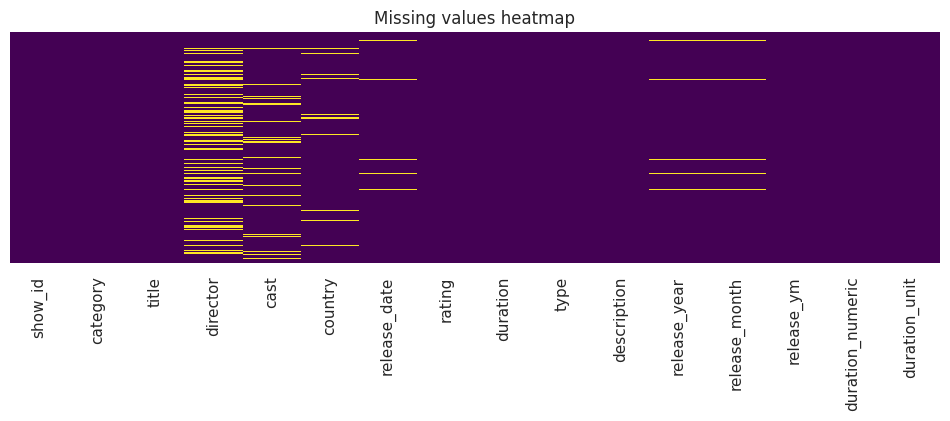

In [16]:
# 08 Missing-value heatmap and percentages
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
display(missing_pct)
plt.figure(figsize=(12,3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing values heatmap')
plt.show()


In [17]:
# 09 Top 20 most frequent titles and duplicates check
display(df['title'].value_counts().head(20))
dups = df[df.duplicated(subset=['title','release_date'], keep=False)].sort_values(['title','release_date'])
print("Number of possible duplicate titles with same release_date:", dups.shape[0])


,count
title,
The Lost Okoroshi,2
Backfire,2
Ricardo Quevedo: Hay gente así,1
Ricardo O'Farrill: Abrazo navideño,1
Ricardo O'Farrill Abrazo Genial,1
"Rica, Famosa, Latina",1
Rhythm + Flow,1
Rhys Nicholson Live at the Athenaeum,1
Rhyme Time Town Singalongs,1


Number of possible duplicate titles with same release_date: 4


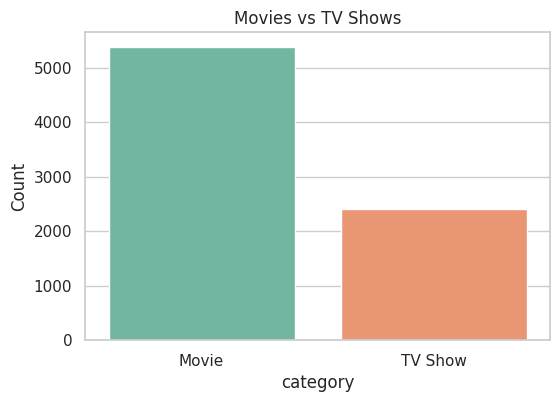

In [18]:
# 10 Distribution: Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index, palette='Set2')
plt.title('Movies vs TV Shows')
plt.ylabel('Count')
plt.show()


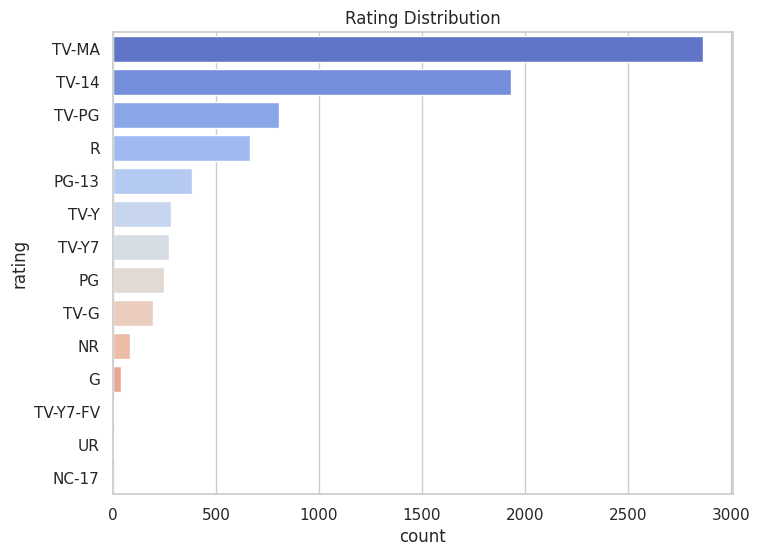

In [19]:
# 11 Rating distribution (ordered)
rating_order = df['rating'].value_counts().index
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='rating', order=rating_order, palette='coolwarm')
plt.title('Rating Distribution')
plt.show()


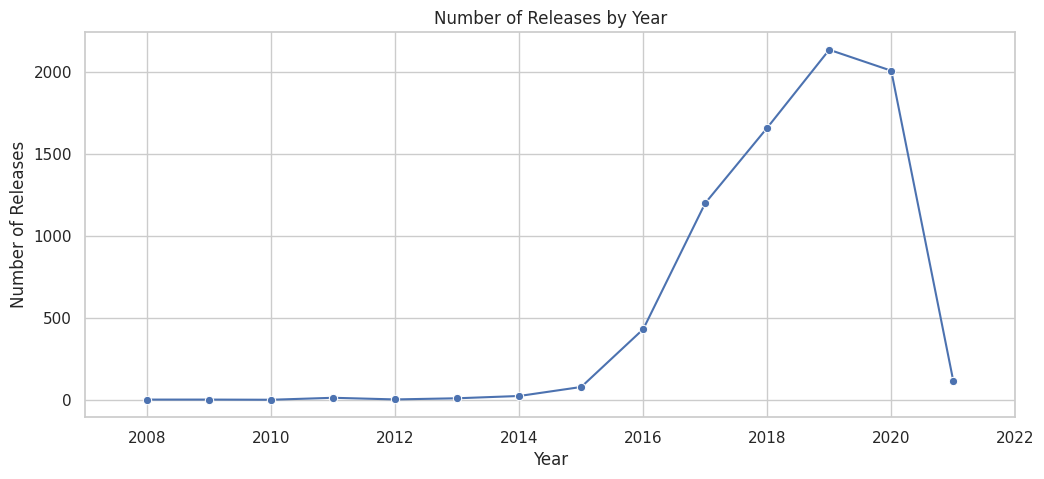

In [20]:
# 12 Release year trend and growth (line plot)
year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Number of Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xlim(year_counts.index.min()-1, year_counts.index.max()+1)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()


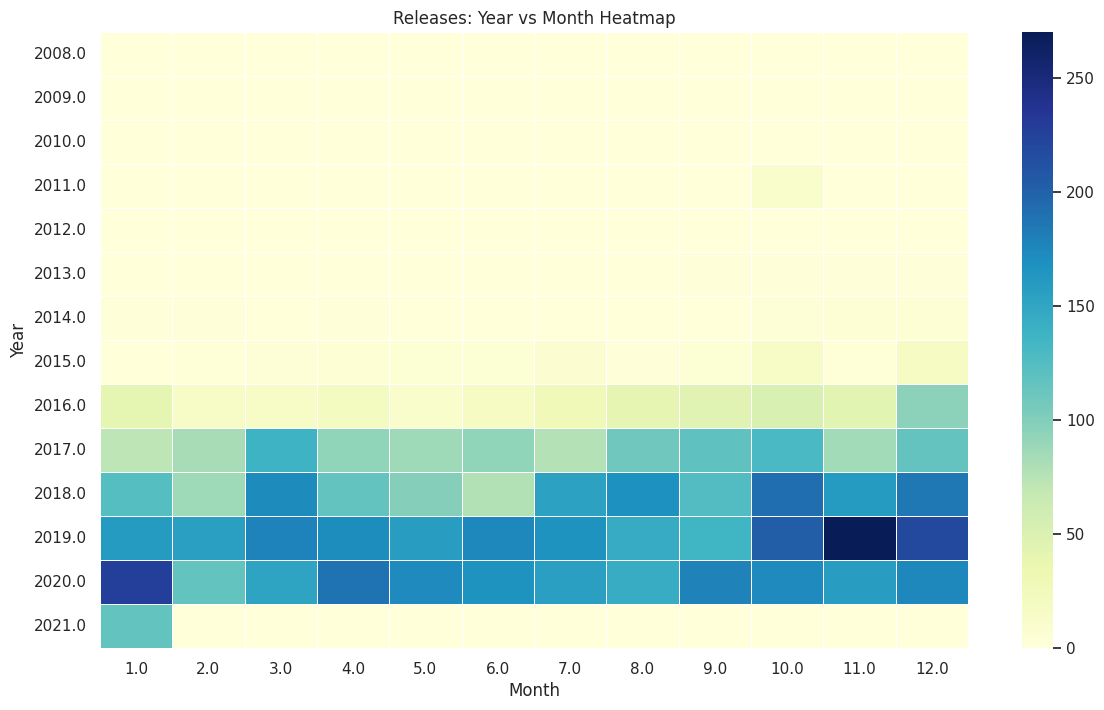

In [21]:
# 13 Monthly cadence (if many years present) — heatmap of year vs month
pivot = df.dropna(subset=['release_year','release_month']).pivot_table(index='release_year', columns='release_month', values='title', aggfunc='count').fillna(0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Releases: Year vs Month Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


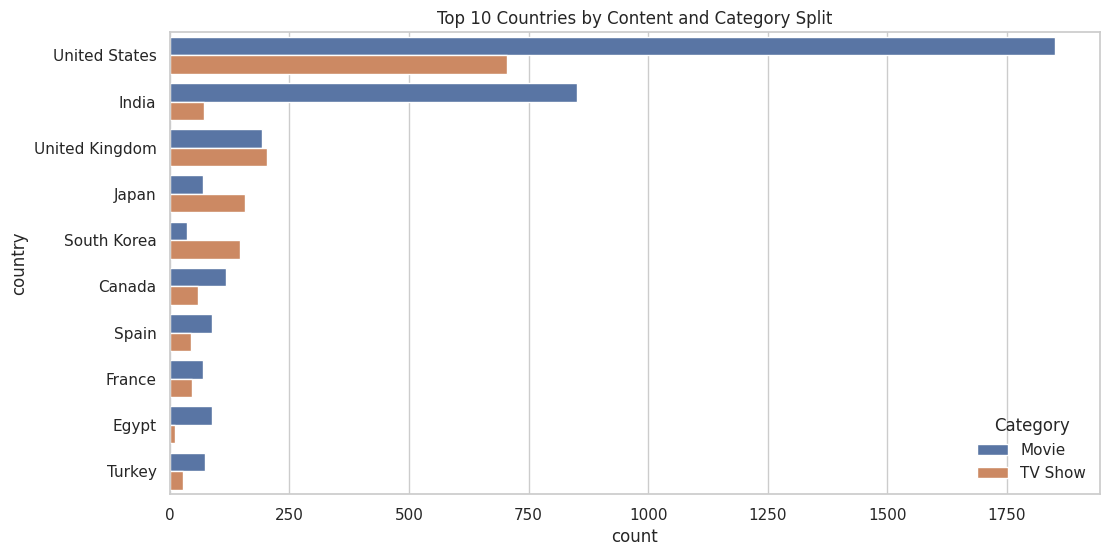

In [22]:
# 14 Country-level analysis: top countries and category split
top_countries = df['country'].value_counts().head(10).index
top_country_df = df[df['country'].isin(top_countries)]
plt.figure(figsize=(12,6))
sns.countplot(data=top_country_df, y='country', hue='category', order=top_countries)
plt.title('Top 10 Countries by Content and Category Split')
plt.legend(title='Category')
plt.show()


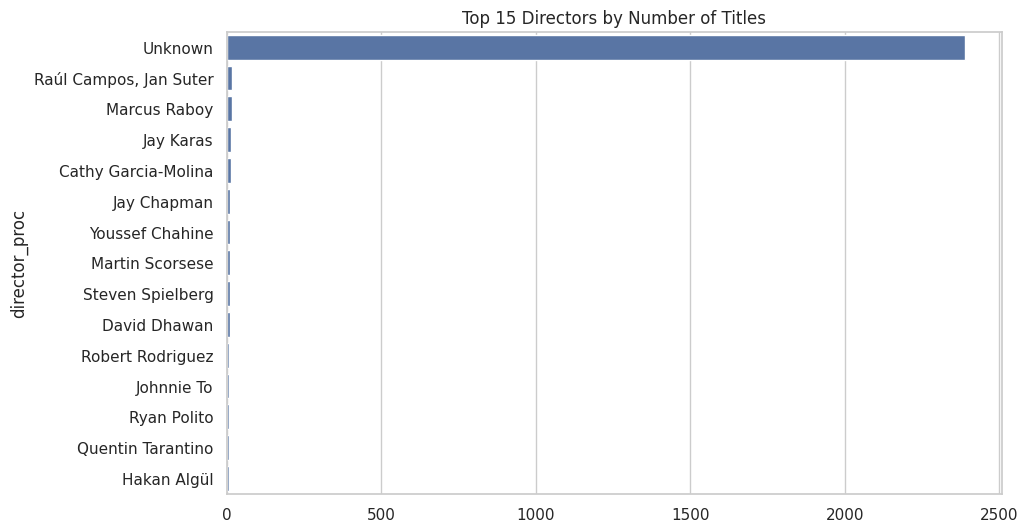

In [23]:
# 15 Director analysis: top directors and missing director handling
df['director_proc'] = df['director'].fillna('Unknown')
top_directors = df['director_proc'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 15 Directors by Number of Titles')
plt.show()


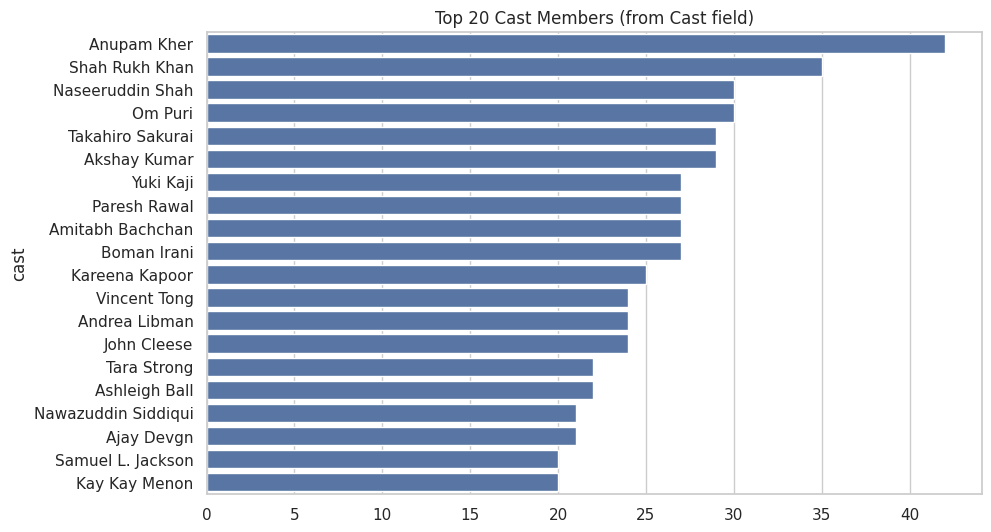

In [24]:
# 16 Cast analysis: explode cast and top actors
# split by comma, explode, trim whitespace
cast_exp = (df['cast'].dropna().str.split(',').apply(lambda arr: [s.strip() for s in arr if s.strip()!='']))
cast_series = cast_exp.explode()
top_cast = cast_series.value_counts().head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cast.values, y=top_cast.index)
plt.title('Top 20 Cast Members (from Cast field)')
plt.show()


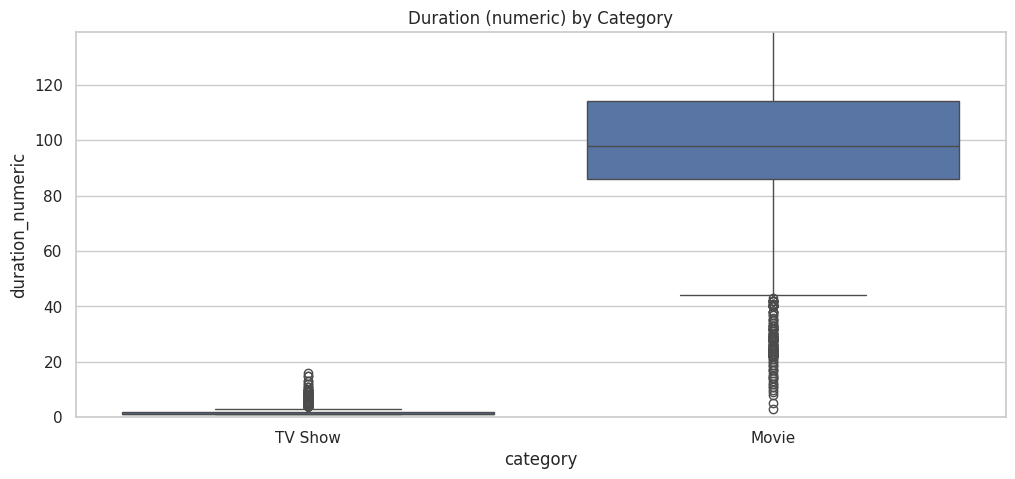

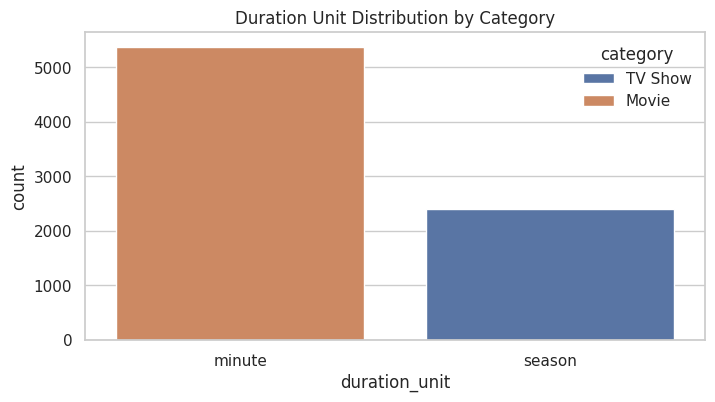

In [25]:
# 17 Duration analysis by category (minutes vs seasons)
plt.figure(figsize=(12,5))
sns.boxplot(data=df[df['duration_unit'].notna()], x='category', y='duration_numeric')
plt.ylim(0, df['duration_numeric'].quantile(0.95))
plt.title('Duration (numeric) by Category')
plt.show()

# Show distribution of duration units across categories
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='duration_unit', hue='category', order=df['duration_unit'].value_counts().index)
plt.title('Duration Unit Distribution by Category')
plt.show()


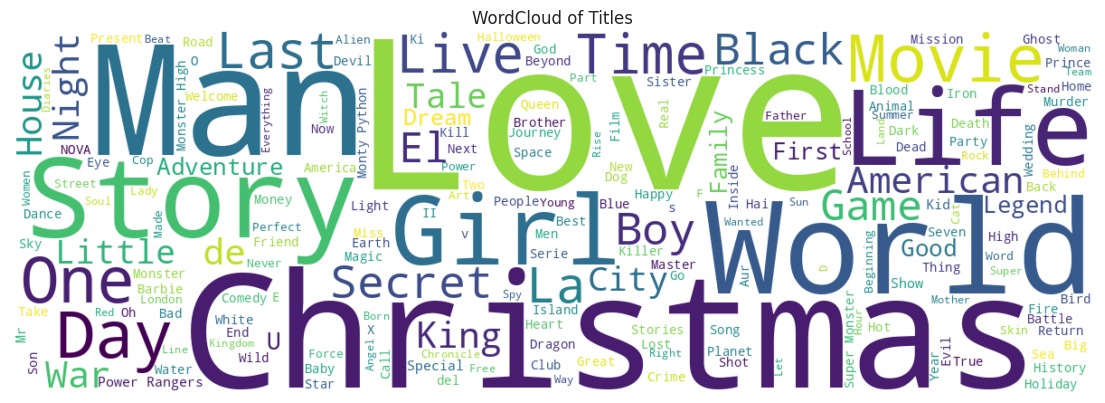

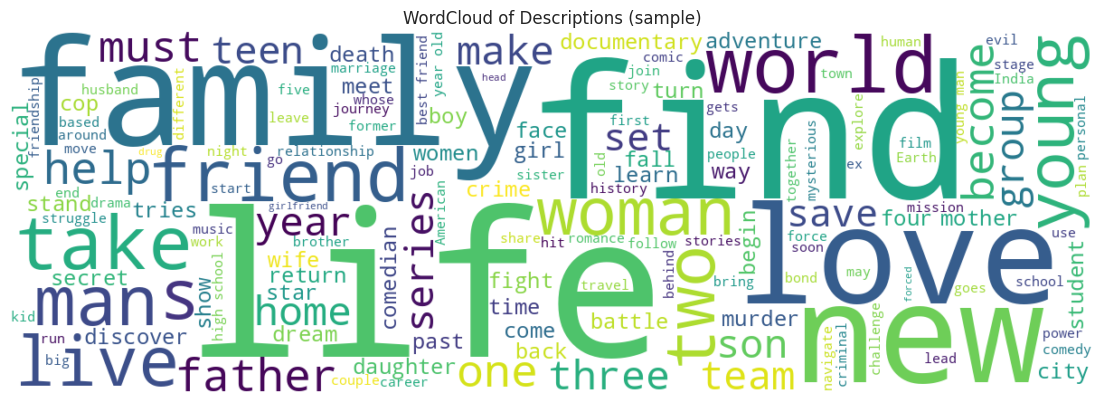

In [26]:
# 18 WordCloud of Titles and most common words in descriptions
titles_text = " ".join(df['title'].dropna().astype(str).values)
wc = WordCloud(width=1200, height=400, background_color='white').generate(titles_text)
plt.figure(figsize=(14,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Titles')
plt.show()

descriptions_text = " ".join(df['description'].dropna().astype(str).values[:5000])  # limit to speed
wc2 = WordCloud(width=1200, height=400, background_color='white', max_words=150).generate(descriptions_text)
plt.figure(figsize=(14,6))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Descriptions (sample)')
plt.show()


In [27]:
# 19 N-gram analysis for titles and descriptions (top unigrams and bigrams)
def top_ngrams(corpus, ngram_range=(1,1), top_n=20):
    cv = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    bag = cv.fit_transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

titles = df['title'].dropna().astype(str).values
top_unigrams_titles = top_ngrams(titles, (1,1), 20)
top_bigrams_titles = top_ngrams(titles, (2,2), 20)
print("Top unigrams in titles:\n", top_unigrams_titles)
print("\nTop bigrams in titles:\n", top_bigrams_titles)


Top unigrams in titles:
 [('love', np.int64(152)), ('man', np.int64(79)), ('christmas', np.int64(78)), ('world', np.int64(69)), ('story', np.int64(67)), ('life', np.int64(66)), ('movie', np.int64(60)), ('little', np.int64(58)), ('time', np.int64(54)), ('high', np.int64(45)), ('live', np.int64(45)), ('el', np.int64(45)), ('la', np.int64(45)), ('american', np.int64(45)), ('black', np.int64(43)), ('house', np.int64(42)), ('power', np.int64(42)), ('girls', np.int64(41)), ('super', np.int64(38)), ('day', np.int64(37))]

Top bigrams in titles:
 [('power rangers', np.int64(31)), ('monster high', np.int64(15)), ('monty python', np.int64(15)), ('super monsters', np.int64(12)), ('new york', np.int64(11)), ('trailer park', np.int64(11)), ('park boys', np.int64(11)), ('kung fu', np.int64(9)), ('kevin hart', np.int64(9)), ('jeff dunham', np.int64(8)), ('krish trish', np.int64(8)), ('trish baltiboy', np.int64(8)), ('little singham', np.int64(8)), ('lifetime sessions', np.int64(8)), ('chhota bheem', 

In [28]:
# 20 TF-IDF + PCA + KMeans clustering on descriptions (content clusters)
sample = df.dropna(subset=['description']).sample(n=min(3000, df.dropna(subset=['description']).shape[0]), random_state=42)
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(sample['description'].values)
svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)
# choose k via silhouette for k=2..6
best_k, best_score = None, -1
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    labs = km.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labs)
    print(f"k={k}, silhouette={score:.4f}")
    if score > best_score:
        best_score, best_k = score, k
print("Best k:", best_k)
km_final = KMeans(n_clusters=best_k, random_state=42).fit(X_reduced)
sample['cluster'] = km_final.labels_
display(sample.groupby('cluster')['title'].count())
# show top terms per cluster
order_centroids = km_final.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names_out()
for i in range(best_k):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i} top terms:", top_terms)


k=2, silhouette=0.1049
k=3, silhouette=0.1030
k=4, silhouette=0.0862
k=5, silhouette=0.0806
k=6, silhouette=0.0837
Best k: 2


,title
cluster,
0,481
1,2519


Cluster 0 top terms: ['000', '10', '16', '17th', '15', '13', '1930s', '10th', 'able', '40']
Cluster 1 top terms: ['000', '18', '11', '12', '25', '1960s', '1990s', '18th', '13', '60']


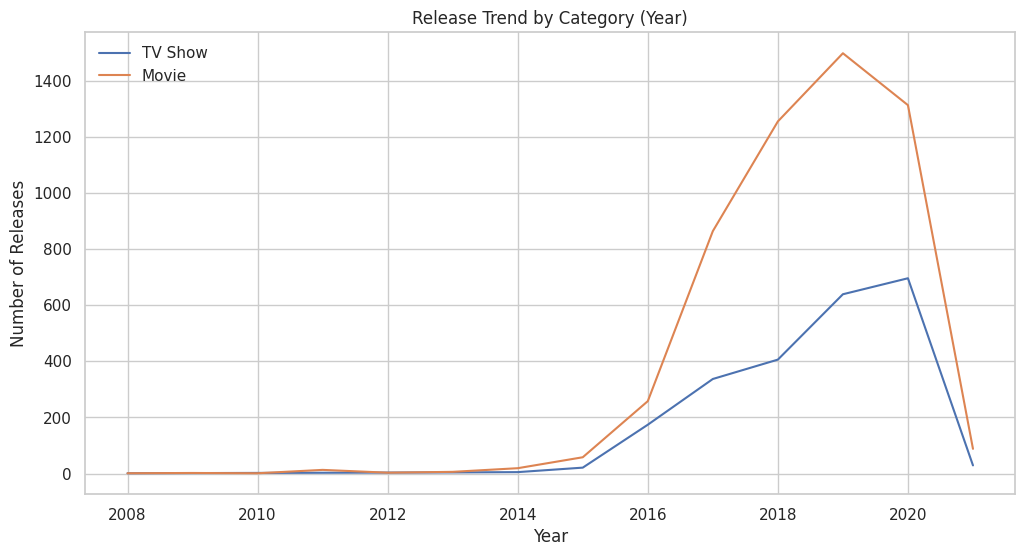

In [29]:
# 21 Temporal analysis by type (Movie vs TV) — release trend
plt.figure(figsize=(12,6))
for cat in df['category'].unique():
    sub = df[df['category']==cat].groupby('release_year').size().sort_index()
    plt.plot(sub.index, sub.values, label=cat)
plt.legend()
plt.title('Release Trend by Category (Year)')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()


In [32]:
# 23 Generate final insights summary (printable)
insights = []
insights.append(f"Total titles: {len(df)}")
insights.append(f"Movies vs TV shows: {df['category'].value_counts().to_dict()}")
insights.append(f"Top country: {df['country'].value_counts().idxmax()} ({df['country'].value_counts().max()} titles)")
insights.append(f"Most common rating: {df['rating'].value_counts().idxmax()} ({df['rating'].value_counts().max()} titles)")
insights.append("Duration: numeric durations available for analysis in 'duration_numeric' and 'duration_unit'.")
insights.append("Missingness: director (~30%) and country (~6.5%) have notable missing values; cast ~9% missing.")
insights.append("Recommendations: (1) enrich missing director/cast where possible, (2) use description TF-IDF clusters to tag content, (3) use time-series forecasting for production trends, (4) perform sentiment/topic modelling on descriptions for content strategy.")
for s in insights:
    print(s)


Total titles: 7789
Movies vs TV shows: {'Movie': 5379, 'TV Show': 2410}
Top country: United States (2556 titles)
Most common rating: TV-MA (2865 titles)
Duration: numeric durations available for analysis in 'duration_numeric' and 'duration_unit'.
Missingness: director (~30%) and country (~6.5%) have notable missing values; cast ~9% missing.
Recommendations: (1) enrich missing director/cast where possible, (2) use description TF-IDF clusters to tag content, (3) use time-series forecasting for production trends, (4) perform sentiment/topic modelling on descriptions for content strategy.


In [37]:
print("Thank You!")

Thank You!
